In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_json("https://raw.githubusercontent.com/amankharwal/Website-data/master/livedata.json")

In [4]:
df.head()

,id,timestamp,latitude,longitude
0,David,2020-07-04 15:35:30,13.148953,77.593651
1,David,2020-07-04 16:35:30,13.222397,77.652828
2,Frank,2020-07-04 14:35:30,13.236507,77.693792
3,Carol,2020-07-04 21:35:30,13.163716,77.562842
4,Ivan,2020-07-04 22:35:30,13.232095,77.580273


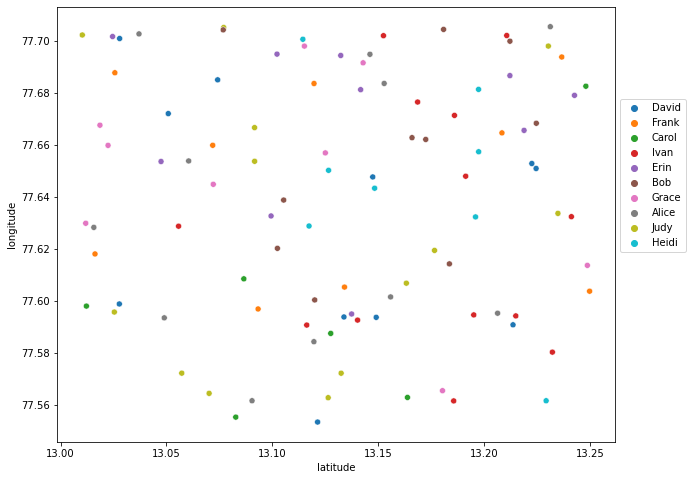

In [7]:
# scatterplot
plt.figure(figsize=(10,8))
# plt.scatter(x='latitude', y='longitude', data=df, hue='id')
sns.scatterplot(x='latitude', y='longitude', data=df, hue='id')
plt.legend(bbox_to_anchor=[1,0.8])
plt.show()

In [9]:
from sklearn.cluster import DBSCAN

def get_infected_names(input_name):

    epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
    model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
    df['cluster'] = model.labels_.tolist()

    input_name_clusters = []
    for i in range(len(df)):
        if df['id'][i] == input_name:
            if df['cluster'][i] in input_name_clusters:
                pass
            else:
                input_name_clusters.append(df['cluster'][i])
    
    infected_names = []
    for cluster in input_name_clusters:
        if cluster != -1:
            ids_in_cluster = df.loc[df['cluster'] == cluster, 'id']
            for i in range(len(ids_in_cluster)):
                member_id = ids_in_cluster.iloc[i]
                if (member_id not in infected_names) and (member_id != input_name):
                    infected_names.append(member_id)
                else:
                    pass
    return infected_names


C:\Users\Saurabh\anaconda3\envs\test\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


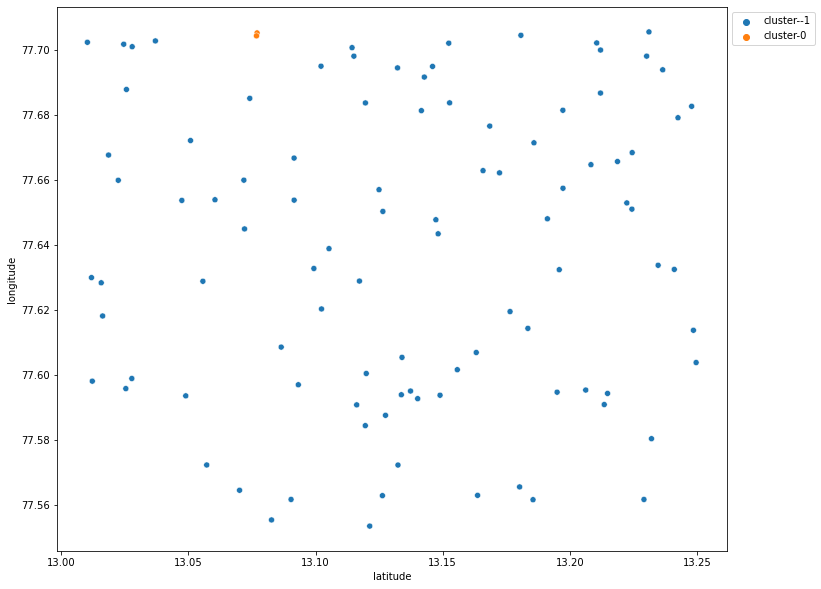

In [22]:
epsilon = 0.0018288 # a radial distance of 6 feet in kilometers
model = DBSCAN(eps=epsilon, min_samples=2, metric='haversine').fit(df[['latitude', 'longitude']])
labels = model.labels_.tolist()
fig = plt.figure(figsize=(12,10))
sns.scatterplot(df['latitude'], df['longitude'], hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])
plt.show()

In [19]:
for name in df['id']:
    print(get_infected_names(name))


[]
[]
[]
[]
[]
[]
['Judy']
[]
[]
[]
[]
[]
[]
['Judy']
['Bob']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Bob']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Bob']
['Bob']
[]
[]
['Judy']
[]
['Bob']
[]
[]
[]
[]
['Bob']
[]
[]
[]
['Bob']
['Bob']
[]
[]
[]
['Judy']
[]
[]
['Judy']
['Bob']
[]
['Bob']
[]
[]
[]
[]
[]
[]
['Judy']
[]
[]
[]
[]
[]
[]
['Judy']
[]
['Bob']
[]
[]
['Bob']
[]
[]
[]
[]
['Judy']
[]
[]
[]
[]
[]
['Bob']
['Judy']
[]
['Judy']
[]
